In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from wordcloud import STOPWORDS

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/lawbot-dataset/dataset_full.csv')
df.head()

,Context,Question,Answer
0,Pasal 3 ayat (2) sebelum perubahan menyatakan:...,Apa inti pengaturan Pasal 3 ayat (2) sebelum d...,"Intinya, semua urusan kebijakan, strategi pert..."
1,Pasal 3 ayat (2) sebelum perubahan menempatkan...,Bagaimana hubungan koordinatif TNI dengan Depa...,TNI wajib menyelaraskan kebijakan dan administ...
2,Istilah yang digunakan dalam ketentuan lama ad...,"Mengapa istilah ""Departemen Pertahanan"" pentin...",Karena pada masa itu nomenklatur resmi lembaga...
3,"Pada periode sebelum perubahan, fokus koordina...",Adakah penekanan khusus terkait perencanaan st...,Tidak ada; versi lama bersifat lebih umum dan ...
4,Ketentuan lama belum menyinggung secara ekspli...,Apakah ruang lingkup koordinasi Departemen Per...,"Belum, sehingga interpretasinya bisa sangat lu..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Context          2188 non-null   object
 1   Question         2188 non-null   object
 2   Answer           2188 non-null   object
 3   Context_length   2188 non-null   int64 
 4   Question_length  2188 non-null   int64 
 5   Answer_length    2188 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 102.7+ KB


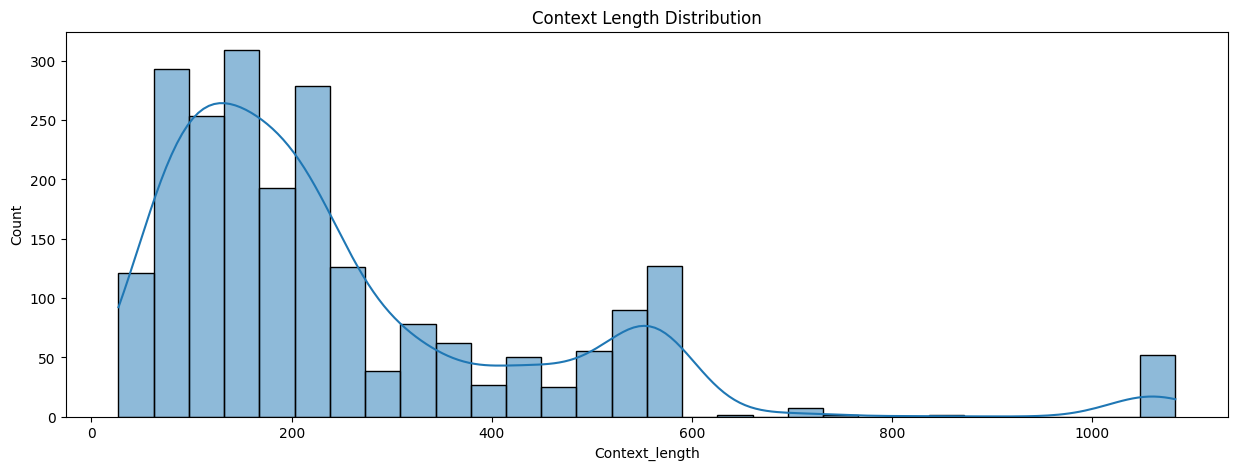

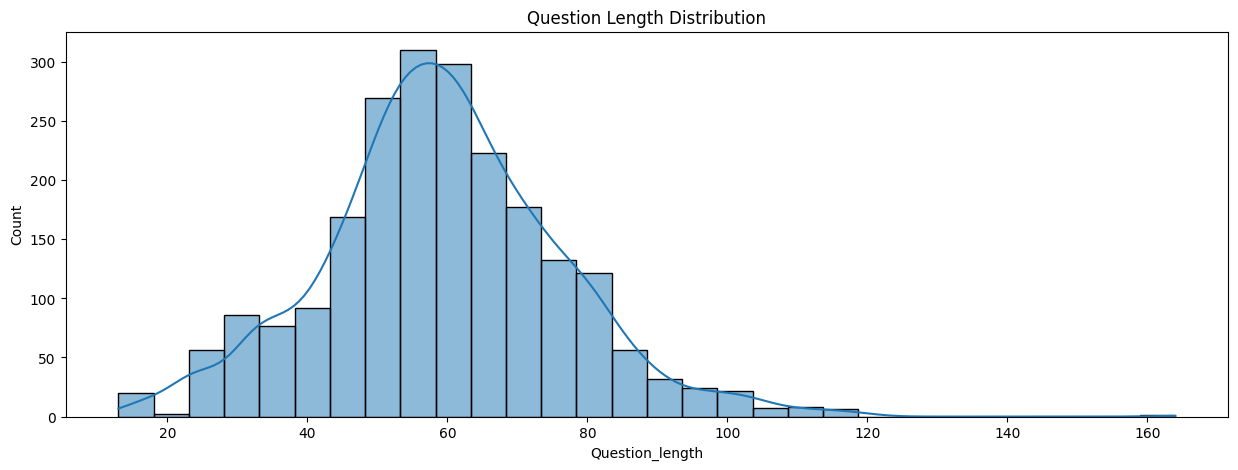

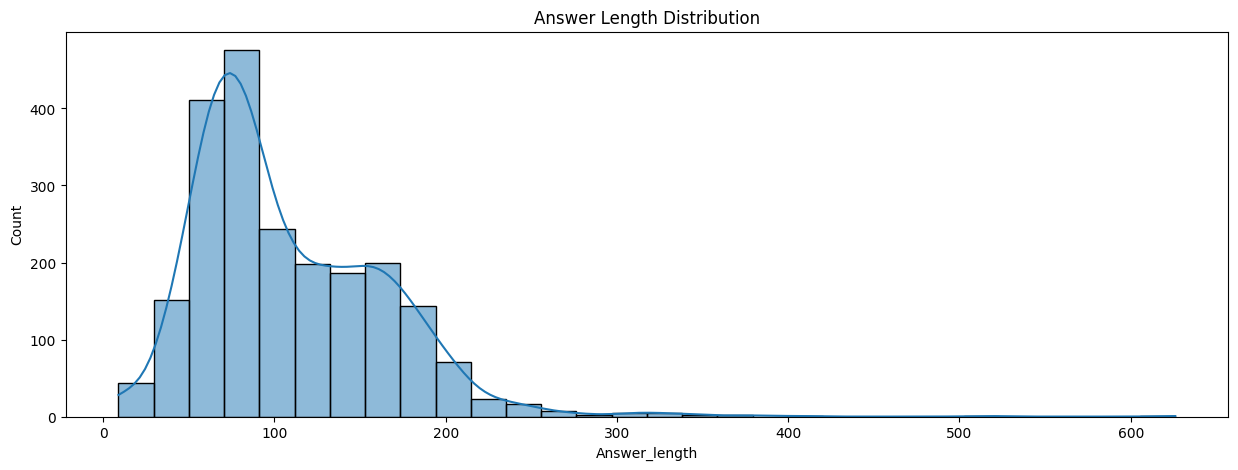

In [8]:
# Dataset info
dataset_info = df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Basic statistics for text fields
df_stats = df.describe(include='object')

# Length analysis
df['Context_length'] = df['Context'].apply(len)
df['Question_length'] = df['Question'].apply(len)
df['Answer_length'] = df['Answer'].apply(len)

length_stats = df[['Context_length', 'Question_length', 'Answer_length']].describe()

# Plot distributions
plt.figure(figsize=(15, 5))
sns.histplot(df['Context_length'], bins=30, kde=True).set_title("Context Length Distribution")
plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(df['Question_length'], bins=30, kde=True).set_title("Question Length Distribution")
plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(df['Answer_length'], bins=30, kde=True).set_title("Answer Length Distribution")
plt.show()

In [13]:
df.describe()

,Context_length,Question_length,Answer_length
count,2188.00000,2188.000000,2188.000000
mean,249.34872,59.375229,108.155393
std,200.11973,16.998224,55.551470
min,27.00000,13.000000,9.000000
25%,114.00000,49.000000,68.000000
50%,185.50000,59.000000,92.000000
75%,314.00000,70.000000,146.000000
max,1083.00000,164.000000,626.000000


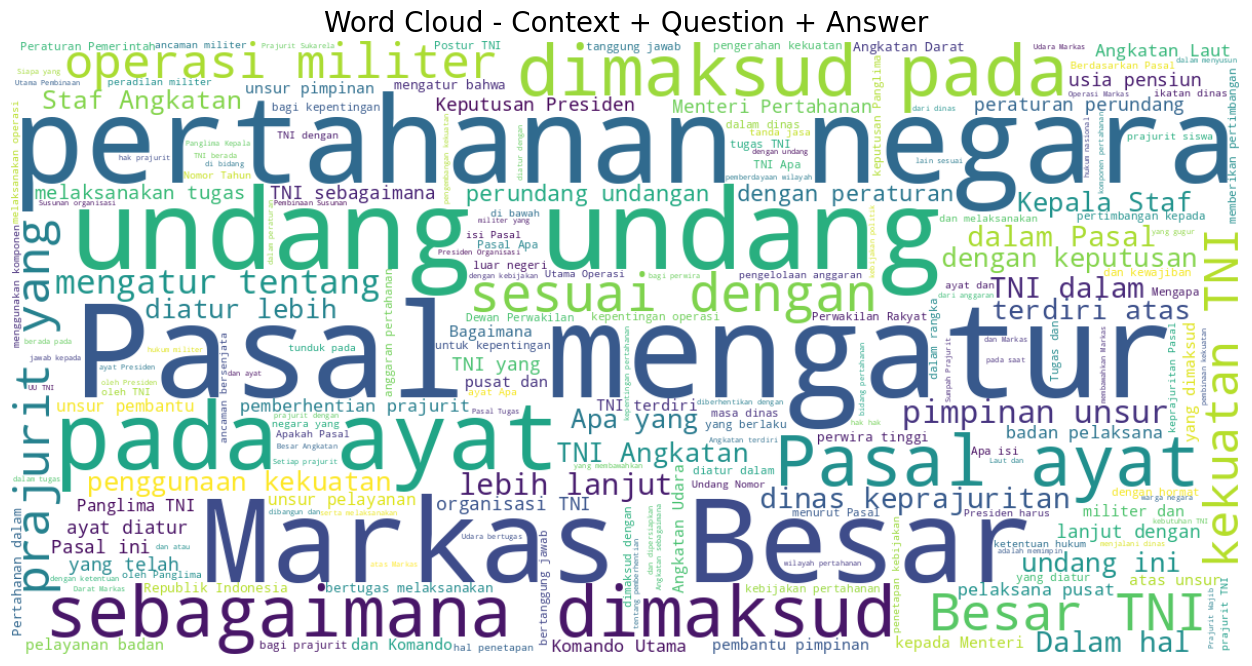

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari kolom 'Context', 'Question', dan 'Answer'
all_text = ' '.join(df['Context']) + ' ' + ' '.join(df['Question']) + ' ' + ' '.join(df['Answer'])

# Buat WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(all_text)

# Tampilkan
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Context + Question + Answer', fontsize=20)
plt.show()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


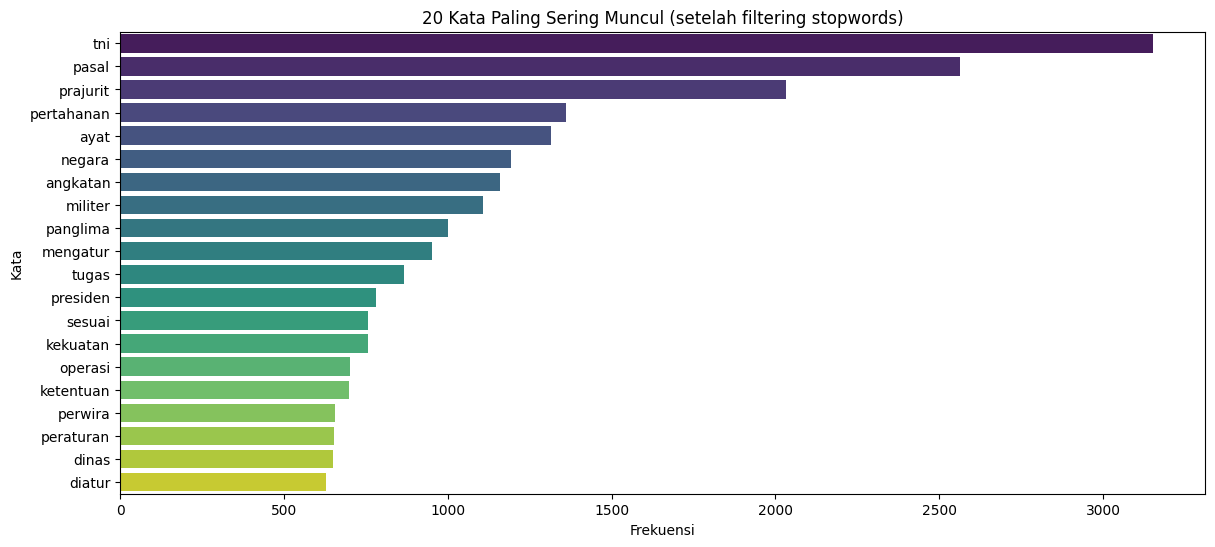

In [10]:

# Download stopwords dan tokenizer NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Bahasa Indonesia stopwords (tambahan)
stopwords_id = set(stopwords.words('indonesian'))
stopwords_all = stopwords_id.union(STOPWORDS)

# Tokenisasi dan hitung frekuensi kata
tokens = word_tokenize(all_text.lower())
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords_all]
word_freq = Counter(filtered_tokens)

# Buat DataFrame dari frekuensi kata
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Tampilkan 20 kata paling sering muncul
top_words = freq_df.head(20)

# Plot frekuensi kata teratas
plt.figure(figsize=(14, 6))
sns.barplot(data=top_words, x='Frequency', y='Word', palette='viridis')
plt.title('20 Kata Paling Sering Muncul (setelah filtering stopwords)')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()